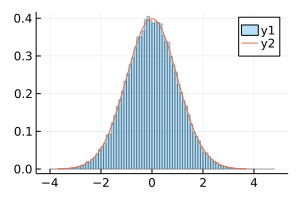

In [1]:
using Distributions
using StatsPlots

# warm up (少し時間を取られる。その間に下のセルでコードを入力する)
histogram(randn(10^5); norm=true, alpha=0.3, size=(300, 200))
plot!(Normal())

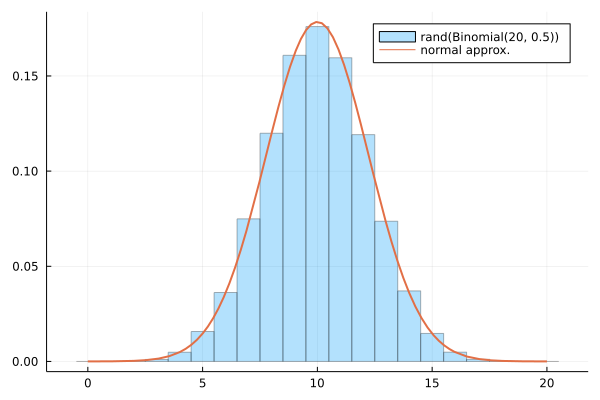

In [2]:
# コインを20回投げたときの表が出る回数の分布は正規分布で近似される。

n = 20
p = 0.5
sample_of_means = rand(Binomial(n, p), 10^5)
histogram(sample_of_means; norm=true, alpha=0.3, bin=-0.5:n+0.5, label="rand(Binomial($n, $p))")
plot!(Normal(n*p, √(n*p*(1-p))), 0, 20; label="normal approx.", lw=2)

In [3]:
# 回数n、確率パラメータpの二項分布オブジェクトを次のように作れる。

bin = Binomial(n, p)

Binomial{Float64}(n=20, p=0.5)

In [4]:
# 確率分布オブジェクトの乱数

rand(bin)

13

In [5]:
# 確率分布オブジェクトの乱数を複数個生成

@show rand(bin, 20);

rand(bin, 20) = [12, 7, 12, 8, 13, 9, 9, 8, 12, 11, 9, 9, 10, 10, 9, 11, 16, 10, 13, 12]


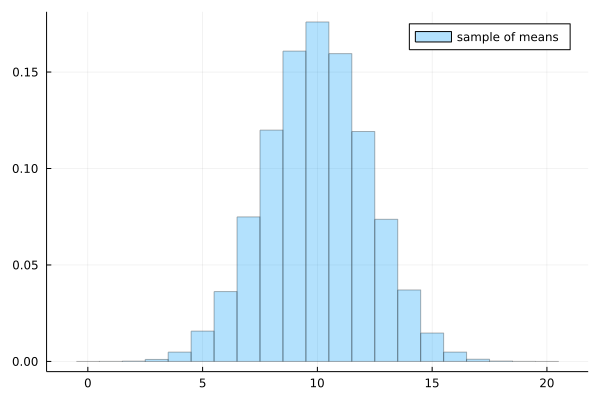

In [6]:
# サンプルのヒストグラム
# norm = true で確率密度函数と比較できるようにする。
# alpha = 0.3 で半透明化pp
# bin = -0.5:n+0.5 で 1 刻みの適切なビンを設定

histogram(sample_of_means; norm=true, alpha=0.3, bin=-0.5:n+0.5, label="sample of means")

In [7]:
# -0.5:n+0.5 は [-0.5, 0.5, 1.5, 2.5, ..., 19.5, 20.5] とほぼ等価

-0.5:n+0.5

-0.5:1.0:20.5

In [8]:
@show collect(-0.5:n+0.5);

collect(-0.5:n + 0.5) = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]


In [9]:
# 平均μ、標準偏差σの正規分布オブジェクトは次にようにして作れる。

normal = Normal(n*p, √(n*p*(1-p)))

Normal{Float64}(μ=10.0, σ=2.23606797749979)

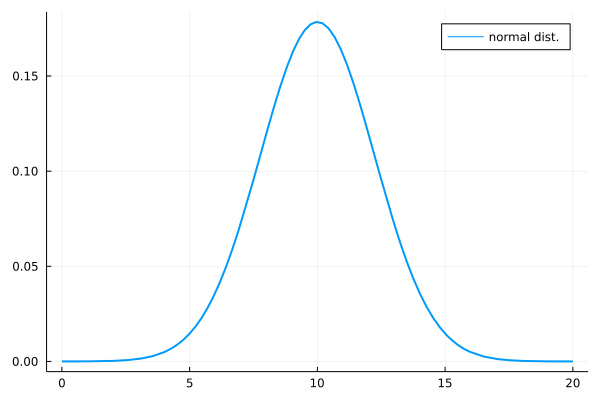

In [10]:
# 確率分布オブジェクト dist は plot(dist) でプロットできる。
# lw = 2 で2倍の太さでプロット

plot(normal, 0, 20; label="normal dist.", lw=2)

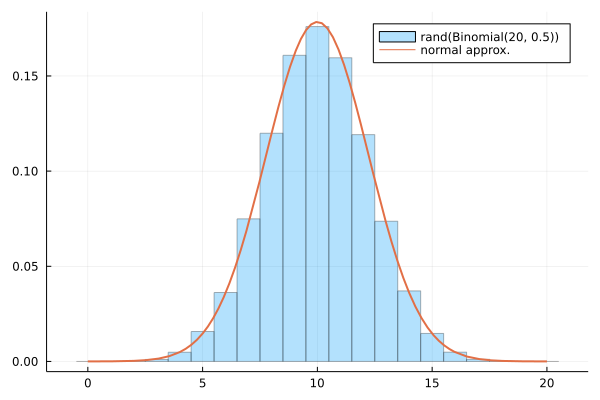

In [11]:
# 以上を重ねてプロット

histogram(sample_of_means; norm=true, alpha=0.3, bin=-0.5:n+0.5, label="rand(Binomial($n, $p))")
plot!(Normal(n*p, √(n*p*(1-p))), 0, 20; label="normal approx.", lw=2)

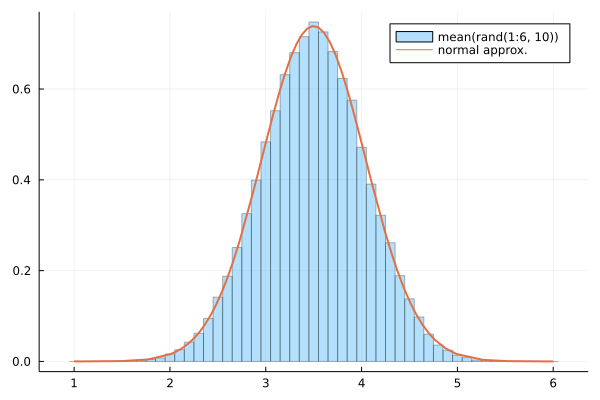

In [12]:
# サイコロを10回振って出た目の平均値の分布は正規分布でよく近似される。

n = 10
M = [mean(rand(1:6, n)) for _ in 1:10^5]
histogram(M; norm=true, alpha=0.3, bin=0.95:0.1:6.05, label="mean(rand(1:6, 10))")
plot!(Normal(mean(1:6), std(1:6; corrected=false)/√n), 1, 6; label="normal approx.", lw=2)

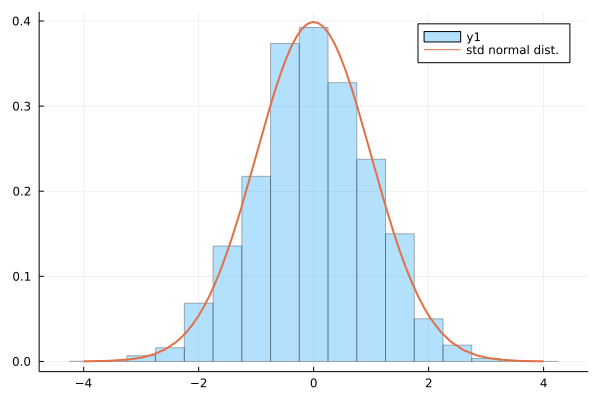

In [13]:
# 2つの確率パラメータ(比率パラメータ)が等しい二項分布で生成されたサンプルのZ統計量は
# 近似的に標準正規分布に従う。

function gensample(bin1, bin2)
    m, n = ntrials(bin1), ntrials(bin2)
    a, b = rand(bin1), rand(bin2)
    c, d = m - a, n - b
    a, b, c, d
end

function zstat(a, b, c, d)
    a*d - b*c == 0 && return zero(inv(a))
    m, n = a + c, b + d
    N = a + b + c + d
    p = (a + b)/N
    Z = (a/m - b/n) / √(p*(1-p)*(1/m + 1/n))
    Z
end

m, n, p = 30, 20, 0.3
bin1 = Binomial(m, p)
bin2 = Binomial(n, p)
Z = [zstat(gensample(bin1, bin2)...) for _ in 1:10^5]

histogram(Z; norm=true, alpha=0.3, bin=-4.25:0.5:4.25)
plot!(Normal(), -4, 4; label="std normal dist.", lw=2)

In [14]:
@code_warntype zstat(1, 2, 3, 4)

Variables
  #self#::Core.Const(zstat)
  a::Int64
  b::Int64
  c::Int64
  d::Int64
  Z::Float64
  p::Float64
  N::Int64
  n::Int64
  m::Int64

Body::Float64
1 ─       Core.NewvarNode(:(Z))
│         Core.NewvarNode(:(p))
│         Core.NewvarNode(:(N))
│         Core.NewvarNode(:(n))
│         Core.NewvarNode(:(m))
│   %6  = (a * d)::Int64
│   %7  = (b * c)::Int64
│   %8  = (%6 - %7)::Int64
│   %9  = (%8 == 0)::Bool
└──       goto #3 if not %9
2 ─ %11 = Main.inv(a)::Float64
│   %12 = Main.zero(%11)::Core.Const(0.0)
└──       return %12
3 ─ %14 = (a + c)::Int64
│   %15 = (b + d)::Int64
│         (m = %14)
│         (n = %15)
│         (N = a + b + c + d)
│   %19 = (a + b)::Int64
│         (p = %19 / N)
│   %21 = (a / m)::Float64
│   %22 = (b / n)::Float64
│   %23 = (%21 - %22)::Float64
│   %24 = p::Float64
│   %25 = (1 - p)::Float64
│   %26 = (1 / m)::Float64
│   %27 = (1 / n)::Float64
│   %28 = (%26 + %27)::Float64
│   %29 = (%24 * %25 * %28)::Float64
│   %30 = √%29::Float64
│         (

In [15]:
# 数式処理を使って、Z統計量の2乗がPearsonのχ²統計量に一致することを確認。
# 上の数値計算で使ったzstat函数をそのまま数式処理で利用する。

using SymPy

@syms a b c d
Z = zstat(a, b, c, d)

                      a       b                      
                    ----- - -----                    
                    a + c   b + d                    
-----------------------------------------------------
      _______________________________________________
     /         /      a + b        \ /  1       1  \ 
    /  (a + b)*|- ------------- + 1|*|----- + -----| 
   /           \  a + b + c + d    / \b + d   a + c/ 
  /    --------------------------------------------- 
\/                     a + b + c + d                 

In [16]:
# Z^2 |> factor は factor(Z^2) に等価
# 以下の計算結果はPearsonのχ²統計量の有名な表示に一致

Z^2 |> factor

             2                 
  (a*d - b*c) *(a + b + c + d) 
-------------------------------
(a + b)*(a + c)*(b + d)*(c + d)

In [17]:
# (O - E)²/E の和で定義されたPearsonのχ²統計量

function chisqstat(a, b, c, d)
    a*d - b*c == 0 && return zero(inv(a))
    N = a + b + c + d
    s, f = a + b, c + d
    m, n = a + c, b + d
    Ea, Eb, Ec, Ed = m*s/N, n*s/N, m*f/N, n*f/N
    X² = (a - Ea)^2/Ea + (b - Eb)^2/Eb + (c - Ec)^2/Ec + (d - Ed)^2/Ed
end

X² = chisqstat(a, b, c, d)

                     2                                        2               
/    (b + d)*(c + d)\                    /    (a + c)*(c + d)\                
|d - ---------------| *(a + b + c + d)   |c - ---------------| *(a + b + c + d
\     a + b + c + d /                    \     a + b + c + d /                
-------------------------------------- + -------------------------------------
           (b + d)*(c + d)                          (a + c)*(c + d)           

                         2                                        2           
    /    (a + b)*(b + d)\                    /    (a + b)*(a + c)\            
)   |b - ---------------| *(a + b + c + d)   |a - ---------------| *(a + b + c
    \     a + b + c + d /                    \     a + b + c + d /            
- + -------------------------------------- + ---------------------------------
               (a + b)*(b + d)                          (a + b)*(a + c)       

     
     
 + d)
     
-----
     

In [18]:
# 以下の計算結果は2×2の分割表のPearson χ²統計量に関する有名な公式

X² |> factor

             2                 
  (a*d - b*c) *(a + b + c + d) 
-------------------------------
(a + b)*(a + c)*(b + d)*(c + d)

In [19]:
# 正確二項検定のP値の定義

# \lessapprox TAB → ⪅
# \approx TAB → ≈
x ⪅ y = x < y || x ≈ y

pval_exact(dist, k) = sum(pdf(dist, j) for j in support(dist) if pdf(dist, j) ⪅ pdf(dist, k))

pval_exact (generic function with 1 method)

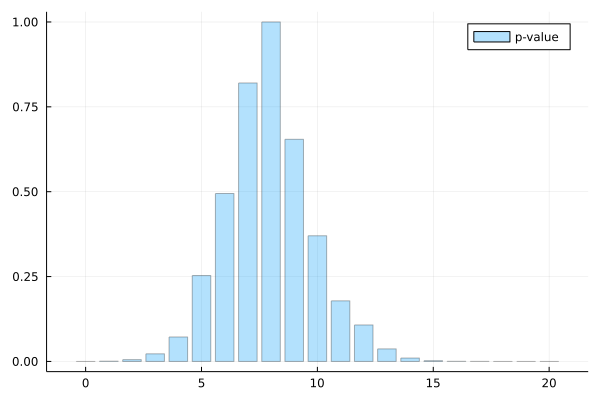

In [20]:
# 正確二項検定のP値の例

n, p = 20, 0.4
bin = Binomial(n, p)

x = support(bin)
y = pval_exact.(bin, support(bin))
bar(x, y; alpha=0.3, label="p-value")

In [21]:
# 信頼区間函数の定義

using Roots

function confint(pvalfunc, mlefunc, n, k, pmin, pmax; α = 0.05)
    f(p) = pvalfunc(n, p, k) - α
    ci = find_zeros(f, pmin, pmax)
    length(ci) ≥ 2 && return ci
    pmle = mlefunc(n, k)
    first(ci) > pmle ? [pmin, first(ci)] : [first(ci), pmax]
end

confint (generic function with 1 method)

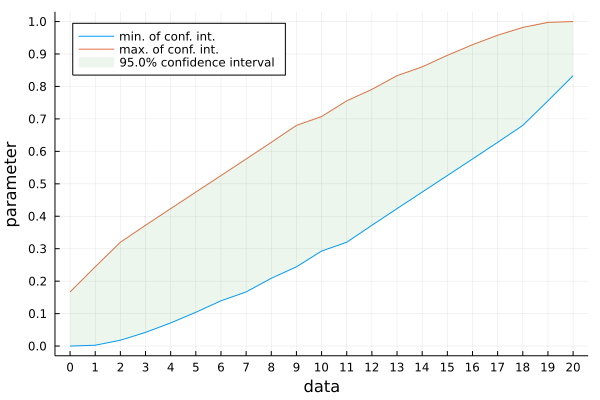

In [22]:
# 信頼区間の例

pvalfunc(n, p, k) = pval_exact(Binomial(n, p), k)
mlefunc(n, k) = k/n
pmin, pmax = 0.0, 1.0

n = 20
k = 0:20
α = 0.05
ci = confint.(pvalfunc, mlefunc, n, k, pmin, pmax; α)
ciL, ciR = first.(ci), last.(ci)

plot(; legend=:topleft)
plot!(k, ciL; label="min. of conf. int.")
plot!(k, ciR; label="max. of conf. int.")
plot!(k, ciL; label="$(100(1 - α))% confidence interval", lw=0, frange=ciR, fa=0.1)
plot!(; xtick=0:n, ytick=0:0.1:1)
plot!(; xlabel="data", ylabel="parameter")